# Code to generate the gene by class array

In [1]:
import pandas as pd
import numpy as np
import json
import collections
from collections import Counter, OrderedDict
from natsort import index_natsorted, natsorted, ns
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3

In [3]:
cellData = pd.read_csv('../data/cellData.tsv', sep='\t')
geneData = pd.read_csv('../data/geneData.tsv', sep='\t')
gene_panel = np.unique(geneData.Gene.values)

# Group by best class and find the avg gene expressions

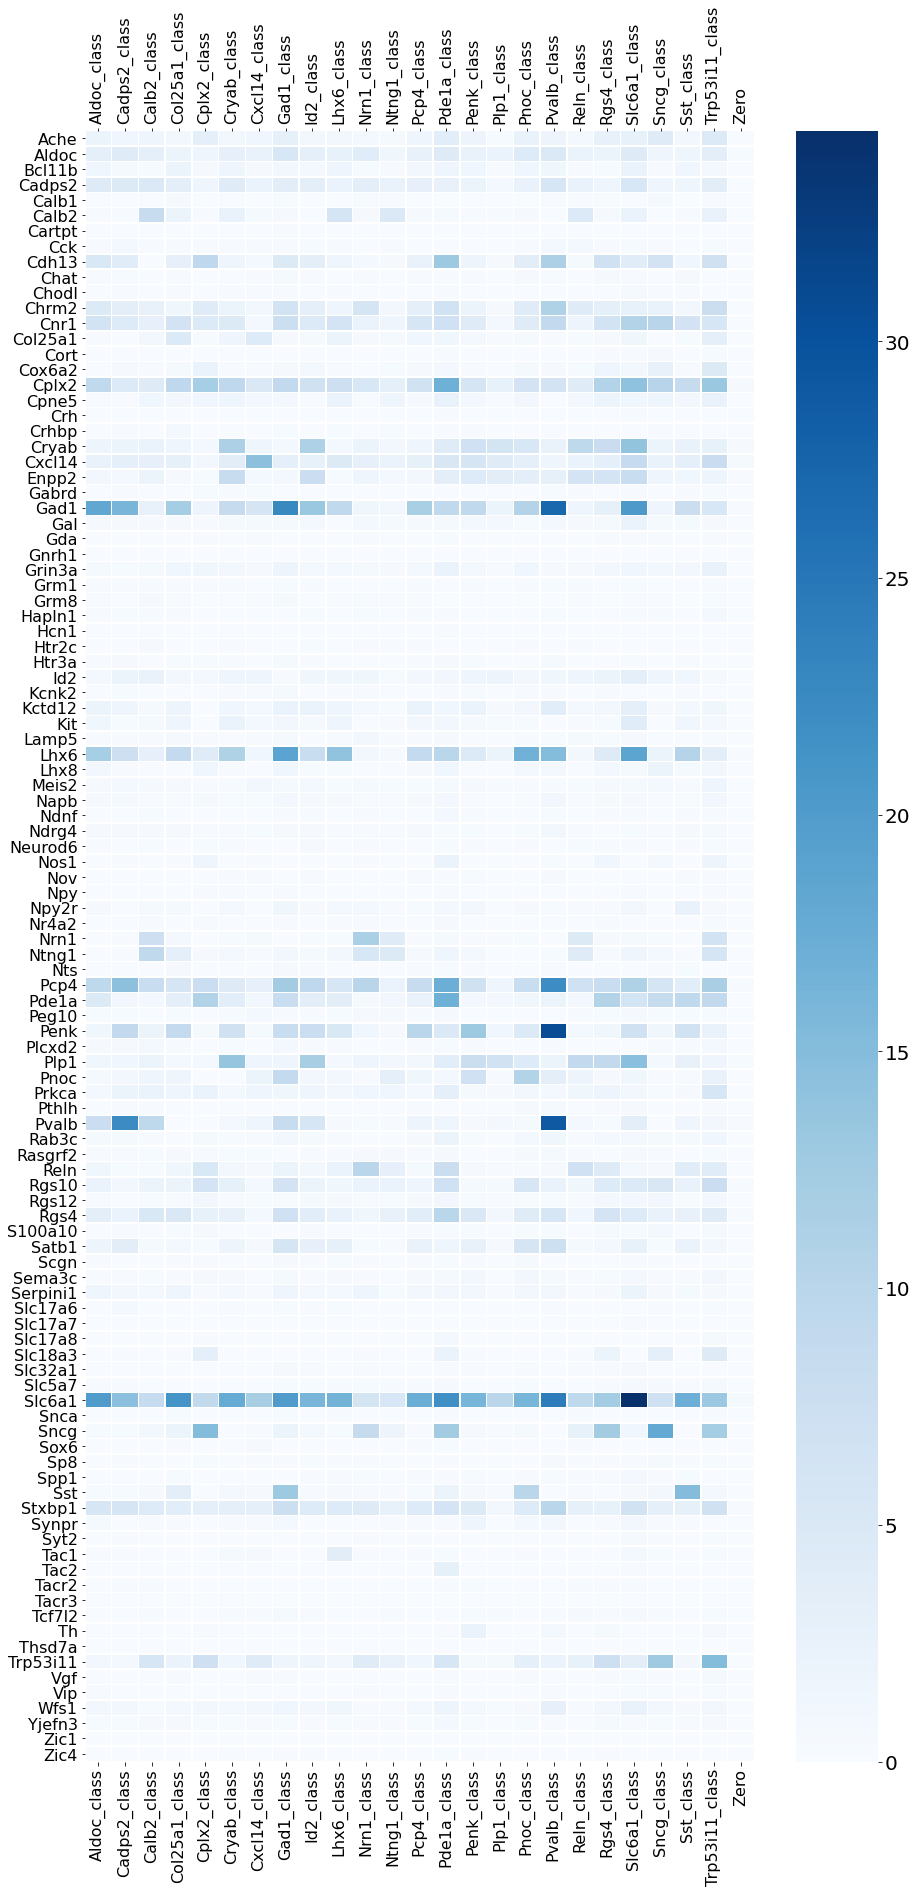

In [5]:
mylist = []
for index, row in cellData.iterrows():
    arr = json.loads(row.Prob)
    idx = np.argmax(arr)
    ClassName = eval(row.ClassName)
    mylist.append(ClassName[idx])
# out
# mylist = sorted(mylist)
df = pd.DataFrame(columns=gene_panel, index=mylist)
for i in range(df.shape[0]):
    cols = eval(cellData.iloc[i].Genenames)
    vals = eval(cellData.iloc[i].CellGeneCount)
    df.iloc[i][cols] = vals

df = df.fillna(0)
df = df.groupby(axis=0, level=0).mean()
df = df.T
df = df.sort_index(axis=1,
                   key=lambda x: np.argsort(index_natsorted(df.columns.values))
                   )
plt.figure(figsize = (15,30))
# ax = sns.heatmap(df, annot=True, cmap="YlGnBu")
ax = sns.heatmap(df, annot=False, cmap="Blues", linewidths=.5)
# plt.savefig('heatmap.png')
# ax.set_xticklabels(rotation = 90, ha="center")
ax.tick_params(top=True, labeltop=True)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.xticks(rotation='vertical')
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.savefig('heatmap.png')
df.to_csv('counts_per_cellclass.csv')

In [6]:
# // {xKey: 1, xLabel: "Astro.1", yKey: 1, yLabel: "Astro.1", val: 0.1904853455312878}
_cols = df.columns.values
_rows = df.index.values

dictlist = []
arr = df.values
for r in range(arr.shape[0]):
    for c in range(arr.shape[1]):
        data = {}
        data['xKey'] = c+1
        data['xLabel'] = _cols[c]
        data['yKey'] = r+1
        data['yLabel'] = _rows[r]
        data['val'] = df.iloc[r, c]
        dictlist.append(data)


In [7]:
pd.DataFrame(dictlist).to_json('genes_by_class.json', orient='records')